In [84]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer import FactorAnalyzer

In [85]:
df = pd.read_csv('data without fraud .csv')
df

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price
0,666743,interest,150000,0.0,Android,banner,0.50
1,512217,interest,150000,0.0,iOS,video,0.75
2,399556,interest,150000,0.0,iOS,search,1.50
3,230119,interest,150000,0.0,iOS,search,1.50
4,619571,consideration,150000,0.0,iOS,search,1.50
...,...,...,...,...,...,...,...
979800,501946,intent,224125,0.0,Android,search,1.50
979801,749577,purchase,224647,2136.0,iOS,search,1.50
979802,929180,intent,224682,0.0,iOS,search,1.50
979803,1034498,intent,225430,0.0,iOS,search,1.50


#### 1. Перекодируем значения таблицы

In [86]:
# OS
le_os = LabelEncoder()
df['os_encoded'] = le_os.fit_transform(df['os'])
print(le_os.classes_)

['Android' 'iOS']


In [87]:
# funnel_stage
order = ['interest', 'consideration', 'intent', 'purchase']
oe_funnel_stage = OrdinalEncoder(categories=[order])
df['funnel_stage_encoded'] = oe_funnel_stage.fit_transform(df[['funnel_stage']])

In [88]:
df

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price,os_encoded,funnel_stage_encoded
0,666743,interest,150000,0.0,Android,banner,0.50,0,0.0
1,512217,interest,150000,0.0,iOS,video,0.75,1,0.0
2,399556,interest,150000,0.0,iOS,search,1.50,1,0.0
3,230119,interest,150000,0.0,iOS,search,1.50,1,0.0
4,619571,consideration,150000,0.0,iOS,search,1.50,1,1.0
...,...,...,...,...,...,...,...,...,...
979800,501946,intent,224125,0.0,Android,search,1.50,0,2.0
979801,749577,purchase,224647,2136.0,iOS,search,1.50,1,3.0
979802,929180,intent,224682,0.0,iOS,search,1.50,1,2.0
979803,1034498,intent,225430,0.0,iOS,search,1.50,1,2.0


#### 2.Корреляция

In [89]:
# кодируем ad_channel и удаляем текстовые стобцы
df['ad_channel_encoded'], uniques = pd.factorize(df['ad_channel'])
df_num = df.drop(columns=['os', 'funnel_stage', 'ad_channel'])
df_num

,user_id,timestamp,profit,price,os_encoded,funnel_stage_encoded,ad_channel_encoded
0,666743,150000,0.0,0.50,0,0.0,0
1,512217,150000,0.0,0.75,1,0.0,1
2,399556,150000,0.0,1.50,1,0.0,2
3,230119,150000,0.0,1.50,1,0.0,2
4,619571,150000,0.0,1.50,1,1.0,2
...,...,...,...,...,...,...,...
979800,501946,224125,0.0,1.50,0,2.0,2
979801,749577,224647,2136.0,1.50,1,3.0,2
979802,929180,224682,0.0,1.50,1,2.0,2
979803,1034498,225430,0.0,1.50,1,2.0,2


In [90]:
df_num.corr()

,user_id,timestamp,profit,price,os_encoded,funnel_stage_encoded,ad_channel_encoded
user_id,1.000000,0.010506,0.023032,0.000509,0.053780,0.045186,0.124020
timestamp,0.010506,1.000000,0.011126,0.052298,0.015309,0.041839,-0.011504
profit,0.023032,0.011126,1.000000,0.008628,0.005895,0.203499,0.001731
price,0.000509,0.052298,0.008628,1.000000,0.205414,0.035460,-0.234658
os_encoded,0.053780,0.015309,0.005895,0.205414,1.000000,0.014266,0.096732
funnel_stage_encoded,0.045186,0.041839,0.203499,0.035460,0.014266,1.000000,0.017872
ad_channel_encoded,0.124020,-0.011504,0.001731,-0.234658,0.096732,0.017872,1.000000


In [91]:
df_num.corr()['profit']

user_id                 0.023032
timestamp               0.011126
profit                  1.000000
price                   0.008628
os_encoded              0.005895
funnel_stage_encoded    0.203499
ad_channel_encoded      0.001731
Name: profit, dtype: float64

<AxesSubplot:>

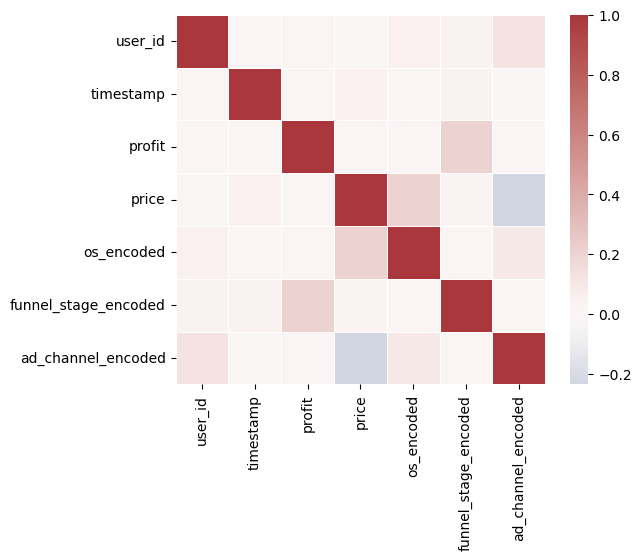

In [92]:
sns.heatmap(df_num.corr(), cmap='vlag', center=0, square=True, linewidths=.5)

In [93]:
pd.DataFrame(np.corrcoef(df_num, rowvar=False), index=df_num.columns, columns=df_num.columns)

,user_id,timestamp,profit,price,os_encoded,funnel_stage_encoded,ad_channel_encoded
user_id,1.000000,0.010506,0.023032,0.000509,0.053780,0.045186,0.124020
timestamp,0.010506,1.000000,0.011126,0.052298,0.015309,0.041839,-0.011504
profit,0.023032,0.011126,1.000000,0.008628,0.005895,0.203499,0.001731
price,0.000509,0.052298,0.008628,1.000000,0.205414,0.035460,-0.234658
os_encoded,0.053780,0.015309,0.005895,0.205414,1.000000,0.014266,0.096732
funnel_stage_encoded,0.045186,0.041839,0.203499,0.035460,0.014266,1.000000,0.017872
ad_channel_encoded,0.124020,-0.011504,0.001731,-0.234658,0.096732,0.017872,1.000000


In [94]:
## Расчет корреляции для цены и идентификатора пользователя с помощью коэффициента Пирсона
alpha = 0.95
result = st.pearsonr(df_num['user_id'], df_num['price'])
result

PearsonRResult(statistic=0.0005085435136905868, pvalue=0.614695938774186)

In [95]:
result.confidence_interval(confidence_level = alpha)

ConfidenceInterval(low=-0.00147151802339872, high=0.002488601063151056)

#### 3. Факторный анализ

In [96]:
df2 = pd.read_csv('data without fraud .csv')
df2

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price
0,666743,interest,150000,0.0,Android,banner,0.50
1,512217,interest,150000,0.0,iOS,video,0.75
2,399556,interest,150000,0.0,iOS,search,1.50
3,230119,interest,150000,0.0,iOS,search,1.50
4,619571,consideration,150000,0.0,iOS,search,1.50
...,...,...,...,...,...,...,...
979800,501946,intent,224125,0.0,Android,search,1.50
979801,749577,purchase,224647,2136.0,iOS,search,1.50
979802,929180,intent,224682,0.0,iOS,search,1.50
979803,1034498,intent,225430,0.0,iOS,search,1.50


In [97]:
le_os = LabelEncoder()
df2['ad_channel_encoded'] = le_os.fit_transform(df['ad_channel'])
df2['funnel_stage_encoded'], uniques = pd.factorize(df2['funnel_stage'])
df2['os_encoded'], uniques = pd.factorize(df2['os'])
df2_num = df2.drop(columns=['os', 'funnel_stage', 'ad_channel'])
df2_num

,user_id,timestamp,profit,price,ad_channel_encoded,funnel_stage_encoded,os_encoded
0,666743,150000,0.0,0.50,0,0,0
1,512217,150000,0.0,0.75,7,0,1
2,399556,150000,0.0,1.50,6,0,1
3,230119,150000,0.0,1.50,6,0,1
4,619571,150000,0.0,1.50,6,1,1
...,...,...,...,...,...,...,...
979800,501946,224125,0.0,1.50,6,2,0
979801,749577,224647,2136.0,1.50,6,3,1
979802,929180,224682,0.0,1.50,6,2,1
979803,1034498,225430,0.0,1.50,6,2,1


In [98]:
x = df2_num.drop(columns='profit')

In [99]:
y = df2_num[['profit']]

In [100]:
# Тест Бартлетта 
chi_square_value, p_value=calculate_bartlett_sphericity(x)
chi_square_value, p_value

(331508.710960963, 0.0)

In [101]:
# Признаки коррелируют между собой

In [102]:
sc = StandardScaler()
x_sc = sc.fit_transform(x)

In [103]:
fa = FactorAnalyzer(n_factors=3)

In [104]:
fa.fit(x_sc)

FactorAnalyzer(rotation_kwargs={})

In [105]:
ev, v = fa.get_eigenvalues()

<AxesSubplot:>

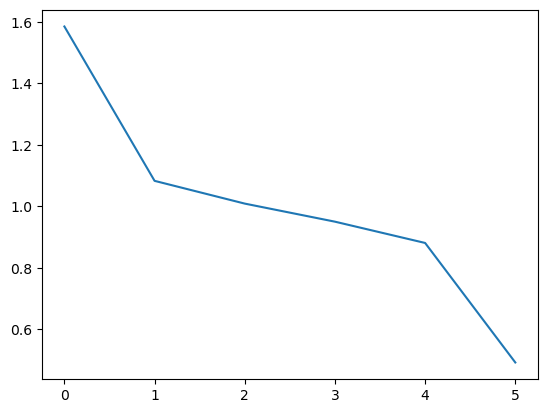

In [106]:
sns.lineplot(data=ev)

In [107]:
## Оставляем факторы, значения которых больше 1
n_factors = 2

In [108]:
fa = FactorAnalyzer(n_factors=n_factors)

In [109]:
fa.fit(x_sc)

FactorAnalyzer(n_factors=2, rotation_kwargs={})

In [110]:
loadings = pd.DataFrame(fa.loadings_, index=x.columns, columns=['factor_{x}'.format(x=x+1) for x in range(n_factors)])

In [111]:
loadings.sort_values(by='factor_1', ascending=False)

,factor_1,factor_2
price,0.925058,-0.082702
ad_channel_encoded,0.608669,-0.222218
os_encoded,0.196484,0.115561
timestamp,0.055861,0.034911
funnel_stage_encoded,0.007742,0.118546
user_id,-0.111049,0.423993


In [112]:
loadings.sort_values(by='factor_2', ascending=False)

,factor_1,factor_2
user_id,-0.111049,0.423993
funnel_stage_encoded,0.007742,0.118546
os_encoded,0.196484,0.115561
timestamp,0.055861,0.034911
price,0.925058,-0.082702
ad_channel_encoded,0.608669,-0.222218


#### 4. Выводы

Коэффициент Пирсона по модулю мал, p-value > 0.05, доверительный интервал содержит 0. Нельзя отказать от гипотезы что коэффициент корреляции равен 0. Cудить о том, что идентификатор пользователя может повлиять на цену, некорректно.

Фактор 1 связал цену и идентификатор пользователя (но мы знаем, что они не коррелируют между собой). Также этот фактор можно интерпретировать как скрытый признак, сильно влияющий на цену и канал рекламы (описывает экономические и рекламные характеристики).

Фактор 2 вероятнее всего связан с характеристиками пользователя и этапами воронки. Возможно канал, откуда пришел пользователь, тоже как-то влияет на его характеристики.  